# OBJECTIVE:

This notebook encompasses a comprehensive data analysis pipeline, including data preprocessing, scaling, similarity matrix calculation, and cluster determination using the elbow method. The analysis extends to the application of various clustering models, specifically K-means, K-medoids, Gaussian Mixture, and agglomerative clustering techniques. The findings are then leveraged to formulate strategic insights and recommendations tailored for the company's specific needs and goals.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
data = files.upload()

Saving survey_data.xlsx to survey_data (1).xlsx


In [ ]:
import pandas as pd

df = pd.read_excel("survey_data.xlsx")
df

,record,id,S1r1,S1r2,S1r3,S2r1,S2r2,S3r1,S3r2,S4r1,...,Q6r1,Q6r2,Q6r3,Q6r4,Q6r5,Q7r1,Q7r2,Q7r3,Q7r4,Q7r5
0,1,9731743,1,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0
1,2,5917428,0,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,3,2459391,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,1,1,0,0
3,4,3277896,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,5,4986375,1,0,0,1,0,0,1,1,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,171,4436816,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
171,172,2124150,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
172,173,1218187,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1
173,174,5498558,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
df.shape


(175, 47)

# **DATA PREPARATION**

In [ ]:
df.isnull().sum()

record    0
id        0
S1r1      0
S1r2      0
S1r3      0
S2r1      0
S2r2      0
S3r1      0
S3r2      0
S4r1      0
S4r2      0
S4r3      0
S4r4      0
S4r5      0
S4r6      0
Q1r1      0
Q1r2      0
Q1r3      0
Q2r1      0
Q2r2      0
Q2r3      0
Q2r4      0
Q3r1      0
Q3r2      0
Q3r3      0
Q3r4      0
Q4r1      0
Q4r2      0
Q4r3      0
Q4r4      0
Q4r5      0
Q5r1      0
Q5r2      0
Q5r3      0
Q5r4      0
Q5r5      0
Q5r6      0
Q6r1      0
Q6r2      0
Q6r3      0
Q6r4      0
Q6r5      0
Q7r1      0
Q7r2      0
Q7r3      0
Q7r4      0
Q7r5      0
dtype: int64

In [ ]:

print(df.describe())


           record            id        S1r1        S1r2        S1r3  \
count  175.000000  1.750000e+02  175.000000  175.000000  175.000000   
mean    88.000000  5.267812e+06    0.588571    0.177143    0.160000   
std     50.662281  2.664352e+06    0.493505    0.382885    0.367658   
min      1.000000  1.035396e+06    0.000000    0.000000    0.000000   
25%     44.500000  2.882270e+06    0.000000    0.000000    0.000000   
50%     88.000000  5.139211e+06    1.000000    0.000000    0.000000   
75%    131.500000  7.396717e+06    1.000000    0.000000    0.000000   
max    175.000000  9.973724e+06    1.000000    1.000000    1.000000   

             S2r1        S2r2        S3r1        S3r2        S4r1  ...  \
count  175.000000  175.000000  175.000000  175.000000  175.000000  ...   
mean     0.862857    0.148571    0.422857    0.451429    0.211429  ...   
std      0.344985    0.356686    0.495431    0.499063    0.409493  ...   
min      0.000000    0.000000    0.000000    0.000000    0.00000

In [ ]:
df = df.dropna()
df.shape

(175, 47)

In [ ]:
#Import all the necessary packages

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler

#importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

#Silhouette score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df[df.duplicated()]

,record,id,S1r1,S1r2,S1r3,S2r1,S2r2,S3r1,S3r2,S4r1,...,Q6r1,Q6r2,Q6r3,Q6r4,Q6r5,Q7r1,Q7r2,Q7r3,Q7r4,Q7r5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 47 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   record  175 non-null    int64
 1   id      175 non-null    int64
 2   S1r1    175 non-null    int64
 3   S1r2    175 non-null    int64
 4   S1r3    175 non-null    int64
 5   S2r1    175 non-null    int64
 6   S2r2    175 non-null    int64
 7   S3r1    175 non-null    int64
 8   S3r2    175 non-null    int64
 9   S4r1    175 non-null    int64
 10  S4r2    175 non-null    int64
 11  S4r3    175 non-null    int64
 12  S4r4    175 non-null    int64
 13  S4r5    175 non-null    int64
 14  S4r6    175 non-null    int64
 15  Q1r1    175 non-null    int64
 16  Q1r2    175 non-null    int64
 17  Q1r3    175 non-null    int64
 18  Q2r1    175 non-null    int64
 19  Q2r2    175 non-null    int64
 20  Q2r3    175 non-null    int64
 21  Q2r4    175 non-null    int64
 22  Q3r1    175 non-null    int64
 23  Q3r2    175 non

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
record,175.0,8.800000e+01,5.066228e+01,1.0,44.5,88.0,131.5,175.0
id,175.0,5.267812e+06,2.664352e+06,1035396.0,2882270.0,5139211.0,7396717.0,9973724.0
S1r1,175.0,5.885714e-01,4.935046e-01,0.0,0.0,1.0,1.0,1.0
S1r2,175.0,1.771429e-01,3.828851e-01,0.0,0.0,0.0,0.0,1.0
S1r3,175.0,1.600000e-01,3.676580e-01,0.0,0.0,0.0,0.0,1.0
S2r1,175.0,8.628571e-01,3.449852e-01,0.0,1.0,1.0,1.0,1.0
S2r2,175.0,1.485714e-01,3.566861e-01,0.0,0.0,0.0,0.0,1.0
S3r1,175.0,4.228571e-01,4.954307e-01,0.0,0.0,0.0,1.0,1.0
S3r2,175.0,4.514286e-01,4.990632e-01,0.0,0.0,0.0,1.0,1.0
S4r1,175.0,2.114286e-01,4.094933e-01,0.0,0.0,0.0,0.0,1.0


In [ ]:
df_new = df.drop(columns=["record", "id"])
df_new.shape

(175, 45)

In [ ]:
#Scaling the data and storing the output as a new dataframe
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(df_new), columns=df_new.columns)

data_scaled.head()

,S1r1,S1r2,S1r3,S2r1,S2r2,S3r1,S3r2,S4r1,S4r2,S4r3,...,Q6r1,Q6r2,Q6r3,Q6r4,Q6r5,Q7r1,Q7r2,Q7r3,Q7r4,Q7r5
0,0.836080,-0.46398,-0.436436,0.398673,-0.417728,1.168274,-0.907148,-0.517799,-0.408248,-0.535504,...,-0.445679,2.393903,-0.232845,3.265986,-1.040833,-0.463980,-0.526661,1.807842,2.243765,-0.417728
1,-1.196058,-0.46398,2.291288,0.398673,-0.417728,1.168274,-0.907148,-0.517799,-0.408248,-0.535504,...,-0.445679,2.393903,-0.232845,-0.306186,-1.040833,-0.463980,-0.526661,1.807842,-0.445679,-0.417728
2,-1.196058,-0.46398,2.291288,0.398673,-0.417728,-0.855963,1.102357,-0.517799,2.449490,-0.535504,...,-0.445679,-0.417728,-0.232845,-0.306186,0.960769,-0.463980,1.898753,1.807842,-0.445679,-0.417728
3,-1.196058,-0.46398,2.291288,0.398673,-0.417728,-0.855963,1.102357,-0.517799,-0.408248,-0.535504,...,-0.445679,-0.417728,-0.232845,-0.306186,0.960769,-0.463980,1.898753,-0.553146,-0.445679,-0.417728
4,0.836080,-0.46398,-0.436436,0.398673,-0.417728,-0.855963,1.102357,1.931251,-0.408248,-0.535504,...,-0.445679,-0.417728,-0.232845,-0.306186,0.960769,2.155264,-0.526661,-0.553146,-0.445679,-0.417728


In [ ]:
#Creating copy of the data to store labels from each algorithm
data_scaled_copy = data_scaled.copy(deep=True)

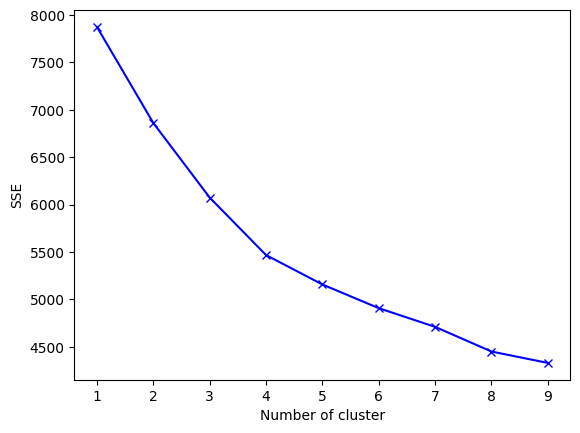

In [ ]:
#Empty dictionary to store the SSE for each value of k
sse = {}

# store the inertia value for that k
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    sse[k] = kmeans.inertia_

#Elbow plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

We can see from the plot that there is a consistent dip from 3 to 9 and there doesn't seem to be a clear 'elbow' here. We may chose any from 3 to 9 as our # of clusters.
So, let's look at another method to get a 'second opinion from maths'. Let's create a plot with Silhouette scores to see how it varies with k.


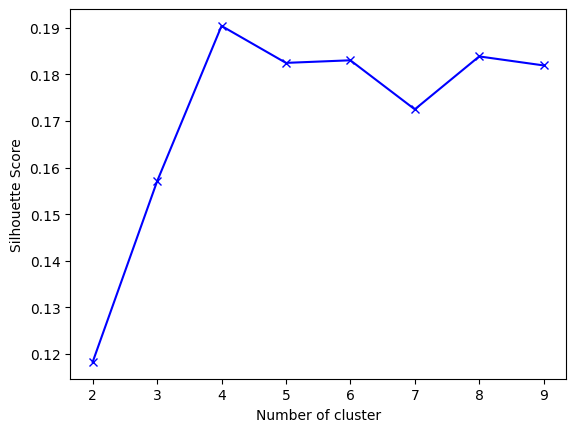

In [ ]:
#Empty dictionary to store the Silhouette score for each value of k
sc = {}

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    labels = kmeans.predict(data_scaled)
    sc[k] = silhouette_score(data_scaled, labels)

#Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

We can see from the plot that silhouette score is highest for k=4. Well that makes it slightly easy for us and we can start with first understanding these 4 clusters. So let's take the number of clusters as 4.

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(data_scaled)

#Adding predicted labels to the original data and scaled data
data_scaled_copy['KMeans_Labels'] = kmeans.predict(data_scaled)
df_new['KMeans_Labels'] = kmeans.predict(data_scaled)

In [ ]:
df_new['KMeans_Labels'].value_counts()

0    53
1    50
2    46
3    26
Name: KMeans_Labels, dtype: int64

# **CLUSTERING METHODS**

# **1. K - MEANS**

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Assuming 'KMeans_Labels' is the column with KMeans cluster assignments
print("For K-Means:")
# Silhouette Score
silhouette_avg = silhouette_score(data_scaled, df_new['KMeans_Labels'])
print(f"Silhouette Score: {silhouette_avg}")

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(data_scaled, df_new['KMeans_Labels'])
print(f"Davies-Bouldin Index: {davies_bouldin}")

# Dunn Index
def dunn_index(X, labels):
    dist_matrix = pairwise_distances(X)
    max_intracluster_distances = np.max([np.max(dist_matrix[labels == i][:, labels == i]) for i in set(labels)])
    min_intercluster_distance = np.min([np.min(dist_matrix[labels == i][:, labels != i]) for i in set(labels)])
    return min_intercluster_distance / max_intracluster_distances

dunn = dunn_index(data_scaled, df_new['KMeans_Labels'])
print(f"Dunn Index: {dunn}")

# Inertia (within-cluster sum of squares)
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(data_scaled, df_new['KMeans_Labels'])
print(f"Calinski-Harabasz Index: {calinski_harabasz}")


For K-Means:
Silhouette Score: 0.19037467310991238
Davies-Bouldin Index: 1.9952298076528867
Dunn Index: 0.3399972878178247
Inertia: 5466.34937715615
Calinski-Harabasz Index: 25.116046565893985


In [ ]:
! pip install scikit-learn-extra

# **2. KMEDOIDS**

In [ ]:
from sklearn_extra.cluster import KMedoids

In [ ]:
kmedo = KMedoids(n_clusters = 4, random_state=1)
kmedo.fit(data_scaled)

data_scaled_copy['kmedoLabels'] = kmedo.predict(data_scaled)
df['kmedoLabels'] = kmedo.predict(data_scaled)

In [ ]:
df.kmedoLabels.value_counts()

1    52
2    47
0    45
3    31
Name: kmedoLabels, dtype: int64

In [ ]:

print("For KMedoids:")

# Silhouette Score
silhouette_avg_kmedo = silhouette_score(data_scaled, df['kmedoLabels'])
print(f"Silhouette Score (KMedoids): {silhouette_avg_kmedo}")

# Davies-Bouldin Index
davies_bouldin_kmedo = davies_bouldin_score(data_scaled, df['kmedoLabels'])
print(f"Davies-Bouldin Index (KMedoids): {davies_bouldin_kmedo}")

# Dunn Index
dunn_kmedo = dunn_index(data_scaled, df['kmedoLabels'])
print(f"Dunn Index (KMedoids): {dunn_kmedo}")


# Calinski-Harabasz Index
calinski_harabasz_kmedo = calinski_harabasz_score(data_scaled, df['kmedoLabels'])
print(f"Calinski-Harabasz Index (KMedoids): {calinski_harabasz_kmedo}")


For KMedoids:
Silhouette Score (KMedoids): 0.1720547543472101
Davies-Bouldin Index (KMedoids): 2.1655883723806943
Dunn Index (KMedoids): 0.17940923323653146
Calinski-Harabasz Index (KMedoids): 23.13419642506999


# **3. GAUSSIAN MIXTURE**

In [ ]:
gmm = GaussianMixture(n_components = 4, random_state = 1)
gmm.fit(data_scaled)

data_scaled_copy['GmmLabels'] = gmm.predict(data_scaled)
df['GmmLabels'] = gmm.predict(data_scaled)

In [ ]:
df.GmmLabels.value_counts()

3    53
0    48
1    48
2    26
Name: GmmLabels, dtype: int64

In [ ]:

print("For GaussianMixture:")

# Silhouette Score
silhouette_avg_gmm = silhouette_score(data_scaled, df['GmmLabels'])
print(f"Silhouette Score (Gaussian Mixture): {silhouette_avg_gmm}")

# Davies-Bouldin Index
davies_bouldin_gmm = davies_bouldin_score(data_scaled, df['GmmLabels'])
print(f"Davies-Bouldin Index (Gaussian Mixture): {davies_bouldin_gmm}")

# Dunn Index
dunn_gmm = dunn_index(data_scaled, df['GmmLabels'])
print(f"Dunn Index (Gaussian Mixture): {dunn_gmm}")


# Calinski-Harabasz Index
calinski_harabasz_gmm = calinski_harabasz_score(data_scaled, df['GmmLabels'])
print(f"Calinski-Harabasz Index (Gaussian Mixture): {calinski_harabasz_gmm}")


For GaussianMixture:
Silhouette Score (Gaussian Mixture): 0.18913307202178153
Davies-Bouldin Index (Gaussian Mixture): 1.9831354227217681
Dunn Index (Gaussian Mixture): 0.30331797533293064
Calinski-Harabasz Index (Gaussian Mixture): 24.848824204072848


# **SIMILARITY METRIX**

In [ ]:
from sklearn.metrics import pairwise_distances

similarity_metric = 'euclidean'

# Calculate pairwise distances
similarity_matrix = pairwise_distances(data_scaled, metric=similarity_metric)

similarity_matrix

array([[0.00000000e+00, 9.65115286e+00, 1.21199278e+01, ...,
        1.18843223e+01, 1.14188285e+01, 1.24593389e+01],
       [9.65115286e+00, 0.00000000e+00, 8.08058083e+00, ...,
        1.04635945e+01, 8.48132675e+00, 8.58127402e+00],
       [1.21199278e+01, 8.08058083e+00, 1.19209290e-07, ...,
        8.96116330e+00, 6.37018545e+00, 4.96747528e+00],
       ...,
       [1.18843223e+01, 1.04635945e+01, 8.96116330e+00, ...,
        0.00000000e+00, 9.27234155e+00, 8.12086886e+00],
       [1.14188285e+01, 8.48132675e+00, 6.37018545e+00, ...,
        9.27234155e+00, 0.00000000e+00, 8.07806123e+00],
       [1.24593389e+01, 8.58127402e+00, 4.96747528e+00, ...,
        8.12086886e+00, 8.07806123e+00, 1.19209290e-07]])

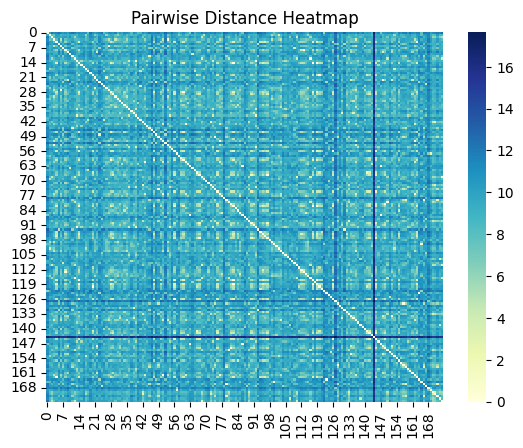

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
sns.heatmap(similarity_matrix, cmap="YlGnBu", annot=False)

# Show the plot
plt.title("Pairwise Distance Heatmap")
plt.show()


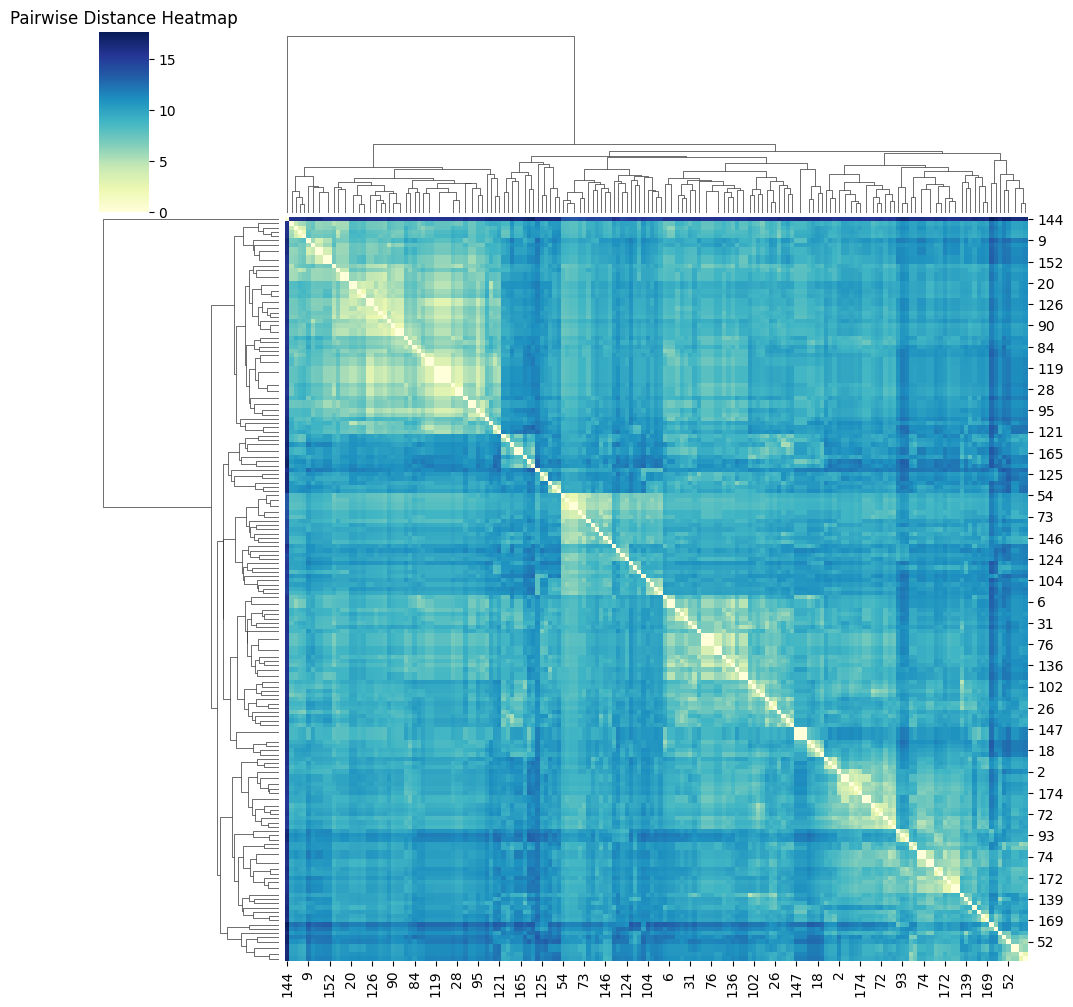

In [ ]:
sns.clustermap(similarity_matrix, cmap="YlGnBu", annot=False)
plt.title("Pairwise Distance Heatmap")
plt.show()


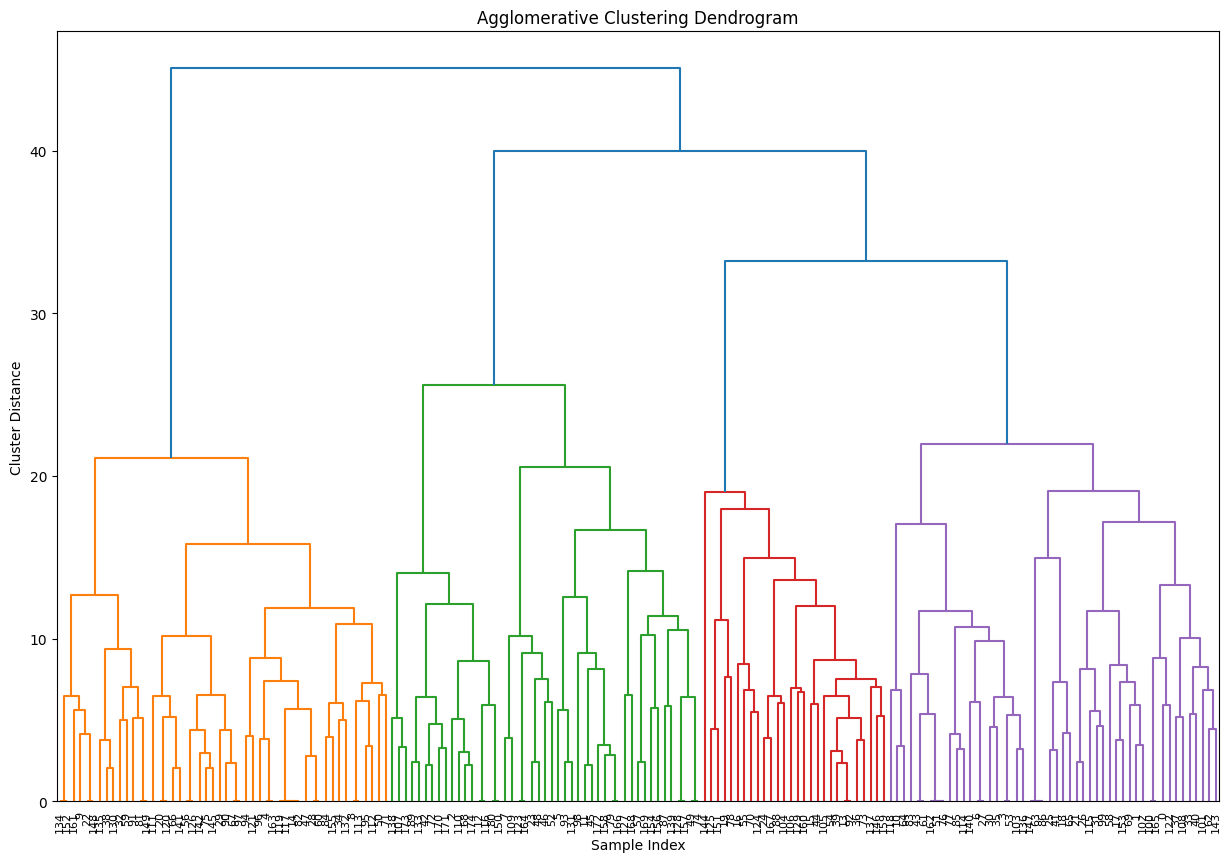

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linkage_matrix = linkage(data_scaled, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix, leaf_rotation=90, leaf_font_size=8)
plt.title("Agglomerative Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Cluster Distance")
plt.show()


# **4. AGGLOMERATIVE CLUSTERING**

Agglomerative Clustering Silhouette Score: 0.1853
Agglomerative Clustering Davies-Bouldin Index: 2.0196
Agglomerative Clustering Dunn Index: 0.3285
Agglomerative Clustering Calinski-Harabasz Index: 24.4863


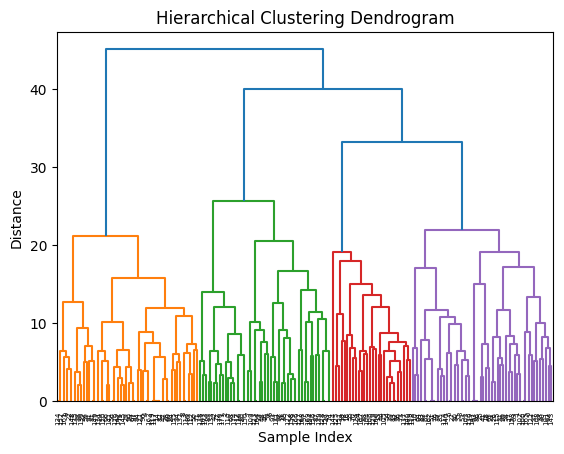

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import calinski_harabasz_score
import numpy as np
import matplotlib.pyplot as plt


# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_labels = agg_clustering.fit_predict(data_scaled)

# Silhouette Score
silhouette_agg = silhouette_score(data_scaled, agg_labels)
print(f"Agglomerative Clustering Silhouette Score: {silhouette_agg:.4f}")

# Davies-Bouldin Index
davies_bouldin_agg = davies_bouldin_score(data_scaled, agg_labels)
print(f"Agglomerative Clustering Davies-Bouldin Index: {davies_bouldin_agg:.4f}")

# Dunn Index
# Calculate pairwise Euclidean distances
distances_agg = euclidean_distances(data_scaled)

# Find minimum inter-cluster distance
min_inter_cluster_distance_agg = np.min([distances_agg[i, j] for i in range(len(data_scaled)) for j in range(len(data_scaled)) if agg_labels[i] != agg_labels[j]])

# Find maximum intra-cluster diameter
max_intra_cluster_diameter_agg = np.max([np.max(distances_agg[np.where(agg_labels == label)][:, np.where(agg_labels == label)]) for label in np.unique(agg_labels)])

# Calculate Dunn Index
dunn_index_agg = min_inter_cluster_distance_agg / max_intra_cluster_diameter_agg
print(f"Agglomerative Clustering Dunn Index: {dunn_index_agg:.4f}")

# Calinski-Harabasz Index
calinski_harabasz_agg = calinski_harabasz_score(data_scaled, agg_labels)
print(f"Agglomerative Clustering Calinski-Harabasz Index: {calinski_harabasz_agg:.4f}")

# Visualize dendrogram
linkage_matrix = linkage(data_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


K-Means Metrics: Silhouette = 0.1900, Davies-Bouldin = 1.9918
K-Medoids Metrics: Silhouette = 0.1721, Davies-Bouldin = 2.1656
Gaussian Mixture Metrics: Silhouette = 0.1891, Davies-Bouldin = 1.9831
Agglomerative Clustering Metrics: Silhouette = 0.1853, Davies-Bouldin = 2.0196


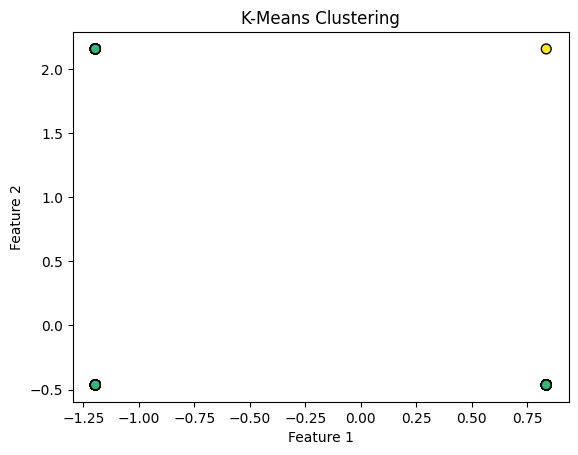

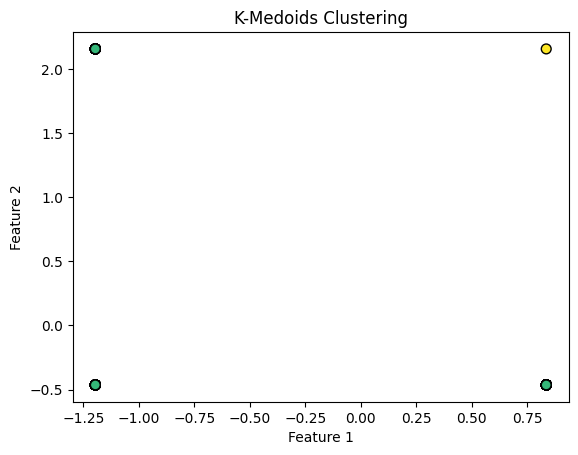

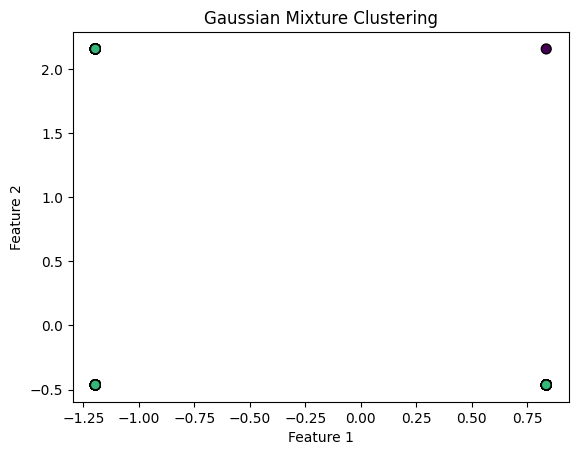

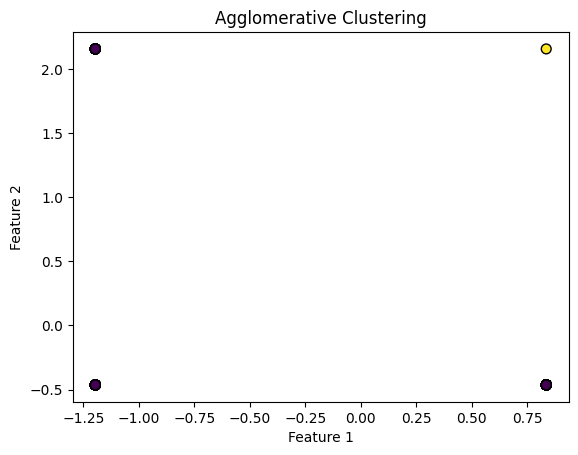

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn import metrics

# Extract the features from the DataFrame
data = data_scaled.values

# Define the number of clusters
n_clusters = 4

# K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(data)

# K-Medoids
kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
kmedoids_labels = kmedoids.fit_predict(data)

# Gaussian Mixture
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_labels = gmm.fit_predict(data)

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_labels = agg_clustering.fit_predict(data)

# Evaluate clustering metrics
def evaluate_clustering(labels, data):
    silhouette = metrics.silhouette_score(data, labels)
    davies_bouldin = metrics.davies_bouldin_score(data, labels)
    return silhouette, davies_bouldin

kmeans_metrics = evaluate_clustering(kmeans_labels, data)
kmedoids_metrics = evaluate_clustering(kmedoids_labels, data)
gmm_metrics = evaluate_clustering(gmm_labels, data)
agg_metrics = evaluate_clustering(agg_labels, data)

print("K-Means Metrics: Silhouette = {:.4f}, Davies-Bouldin = {:.4f}".format(*kmeans_metrics))
print("K-Medoids Metrics: Silhouette = {:.4f}, Davies-Bouldin = {:.4f}".format(*kmedoids_metrics))
print("Gaussian Mixture Metrics: Silhouette = {:.4f}, Davies-Bouldin = {:.4f}".format(*gmm_metrics))
print("Agglomerative Clustering Metrics: Silhouette = {:.4f}, Davies-Bouldin = {:.4f}".format(*agg_metrics))

# Visualize cluster assignments
def visualize_clusters(data, labels, title):
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Visualize K-Means clusters
visualize_clusters(data, kmeans_labels, 'K-Means Clustering')

# Visualize K-Medoids clusters
visualize_clusters(data, kmedoids_labels, 'K-Medoids Clustering')

# Visualize Gaussian Mixture clusters
visualize_clusters(data, gmm_labels, 'Gaussian Mixture Clustering')

# Visualize Agglomerative Clustering clusters
visualize_clusters(data, agg_labels, 'Agglomerative Clustering')


In [ ]:
df_new.columns

Index(['S1r1', 'S1r2', 'S1r3', 'S2r1', 'S2r2', 'S3r1', 'S3r2', 'S4r1', 'S4r2',
       'S4r3', 'S4r4', 'S4r5', 'S4r6', 'Q1r1', 'Q1r2', 'Q1r3', 'Q2r1', 'Q2r2',
       'Q2r3', 'Q2r4', 'Q3r1', 'Q3r2', 'Q3r3', 'Q3r4', 'Q4r1', 'Q4r2', 'Q4r3',
       'Q4r4', 'Q4r5', 'Q5r1', 'Q5r2', 'Q5r3', 'Q5r4', 'Q5r5', 'Q5r6', 'Q6r1',
       'Q6r2', 'Q6r3', 'Q6r4', 'Q6r5', 'Q7r1', 'Q7r2', 'Q7r3', 'Q7r4', 'Q7r5',
       'KMeans_Labels'],
      dtype='object')

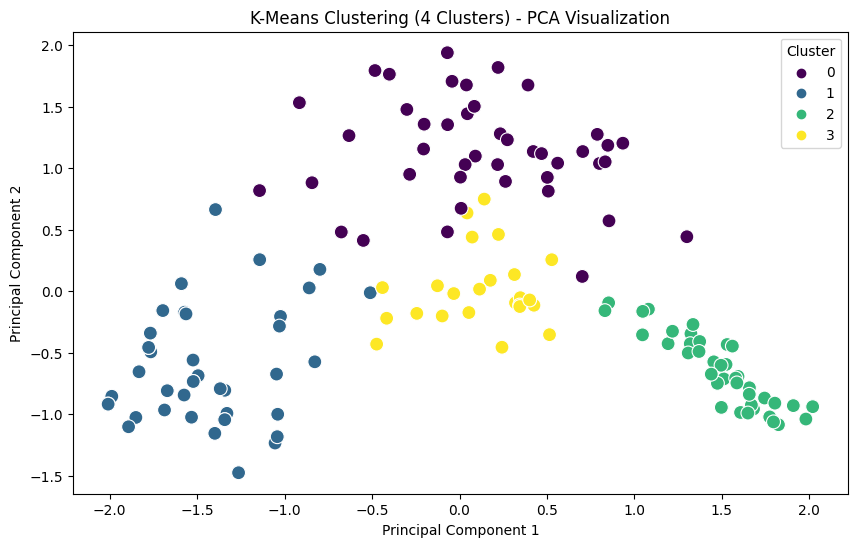

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Extract features and labels
features = df_new.drop(['S1r1', 'S1r2', 'S1r3', 'S2r1', 'KMeans_Labels'], axis=1)
labels = df_new['KMeans_Labels']

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
components = pca.fit_transform(features)

# Create a DataFrame with the principal components and labels
pc_df = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
pc_df['Cluster'] = labels

# Visualize the clusters in 2D space
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pc_df, palette='viridis', s=100)
plt.title('K-Means Clustering (4 Clusters) - PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
df_new

,S1r1,S1r2,S1r3,S2r1,S2r2,S3r1,S3r2,S4r1,S4r2,S4r3,...,Q6r2,Q6r3,Q6r4,Q6r5,Q7r1,Q7r2,Q7r3,Q7r4,Q7r5,KMeans_Labels
0,1,0,0,1,0,1,0,0,0,0,...,1,0,1,0,0,0,1,1,0,0
1,0,0,1,1,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,1,1,0,0,1,0,1,0,...,0,0,0,1,0,1,1,0,0,2
3,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,1,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,1,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,2
171,0,1,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,2
172,1,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,2
173,1,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,2


In [ ]:
cluster_stats = df_new.groupby('KMeans_Labels').mean()
print(cluster_stats)


                   S1r1      S1r2      S1r3      S2r1  S2r2      S3r1  \
KMeans_Labels                                                           
0              0.622642  0.188679  0.188679  1.000000   0.0  0.452830   
1              0.740000  0.140000  0.120000  1.000000   0.0  0.520000   
2              0.608696  0.173913  0.217391  1.000000   0.0  0.500000   
3              0.192308  0.230769  0.076923  0.076923   1.0  0.038462   

                   S3r2      S4r1      S4r2      S4r3  ...      Q6r1  \
KMeans_Labels                                          ...             
0              0.547170  0.000000  0.094340  0.094340  ...  0.056604   
1              0.480000  0.660000  0.260000  0.000000  ...  0.100000   
2              0.500000  0.000000  0.086957  0.695652  ...  0.413043   
3              0.115385  0.153846  0.115385  0.076923  ...  0.076923   

                   Q6r2      Q6r3      Q6r4      Q6r5      Q7r1      Q7r2  \
KMeans_Labels                                      

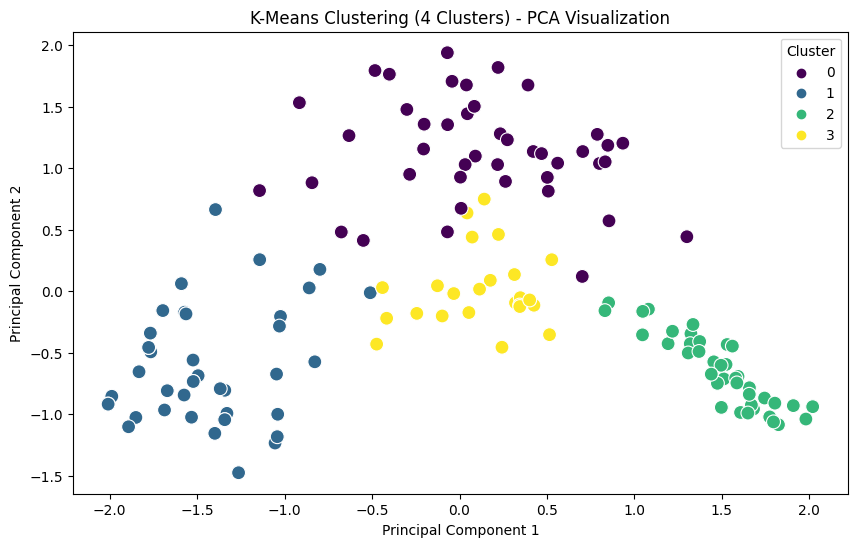

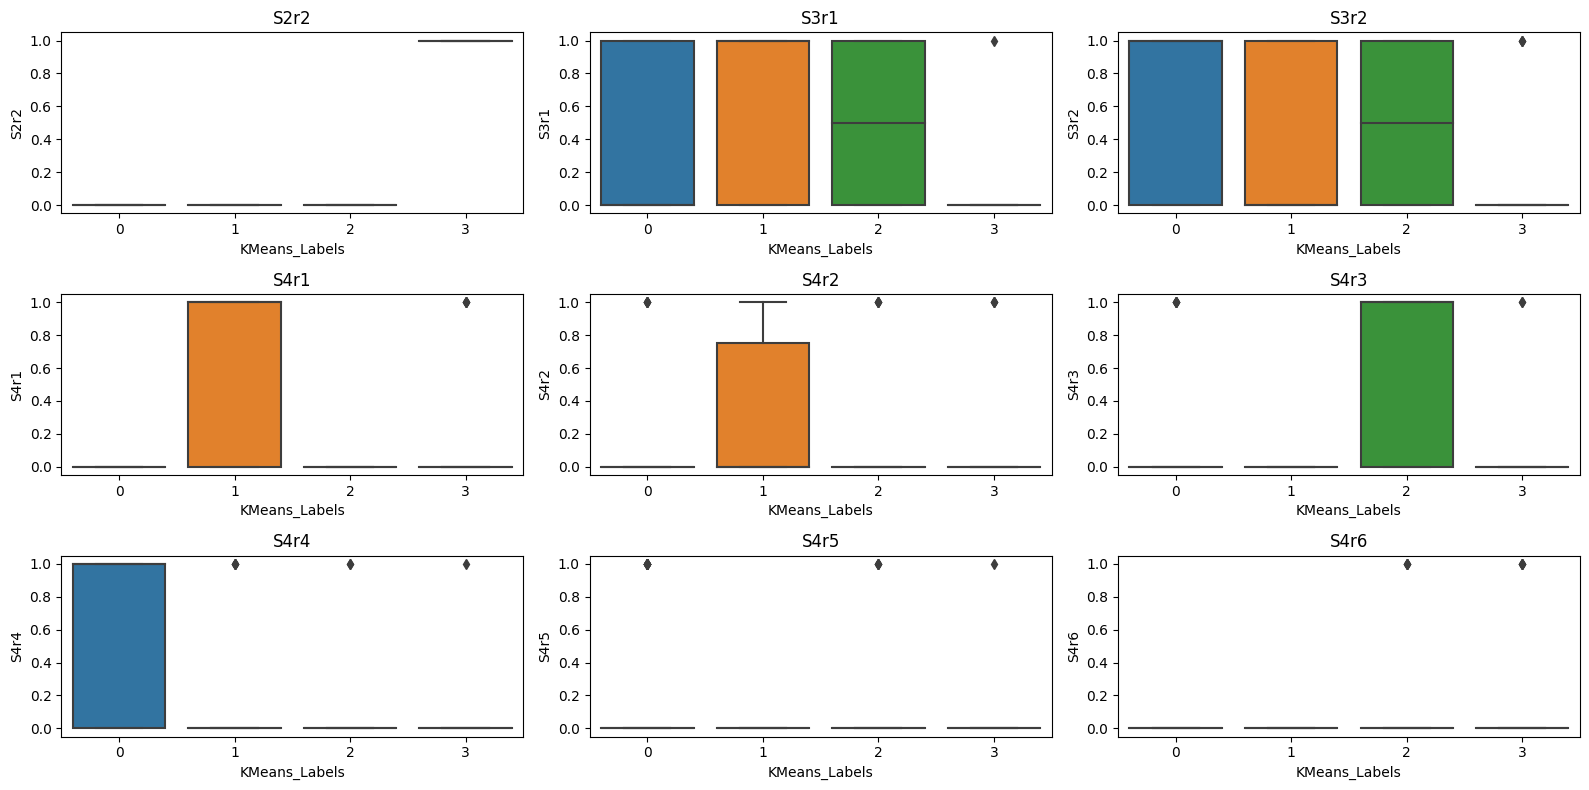

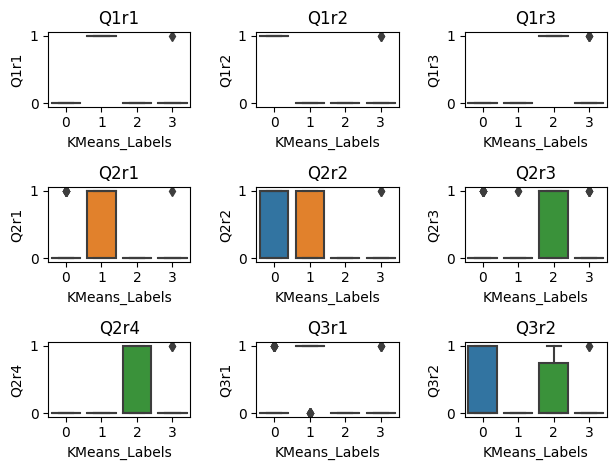

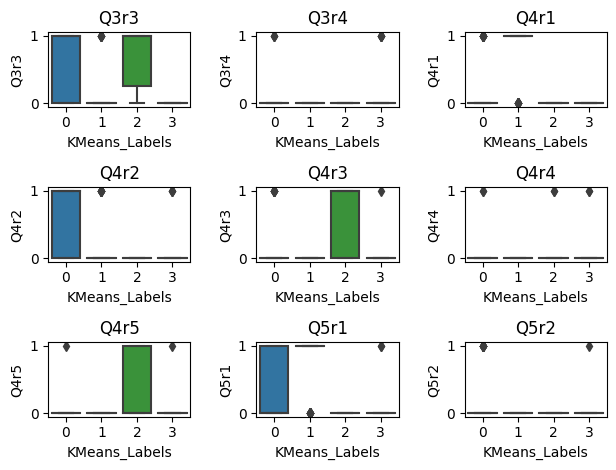

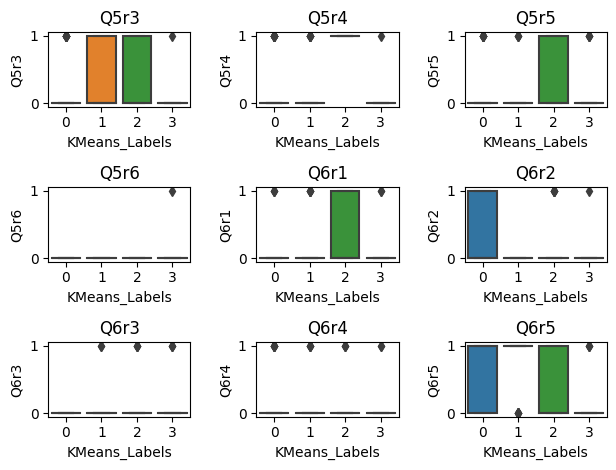

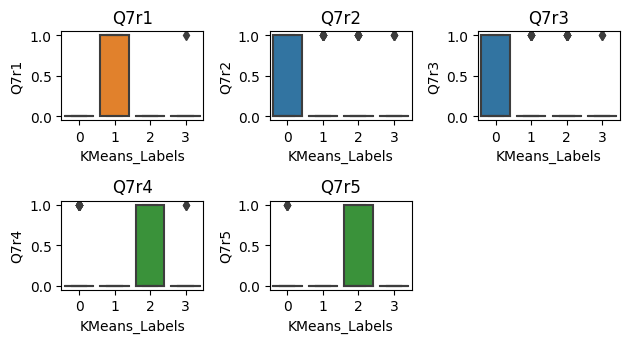

<Figure size 1600x800 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract features and labels
features = df_new.drop(['S1r1', 'S1r2', 'S1r3', 'S2r1', 'KMeans_Labels'], axis=1)
labels = df_new['KMeans_Labels']

# Identify categorical features
categorical_features = features.select_dtypes(include=['object']).columns

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
components = pca.fit_transform(features)

# Create a DataFrame with the principal components and labels
pc_df = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
pc_df['Cluster'] = labels

# Visualize the clusters in 2D space
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pc_df, palette='viridis', s=100)
plt.title('K-Means Clustering (4 Clusters) - PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Box plots for continuous features
plt.figure(figsize=(16, 8))
for i, col in enumerate(features.columns):
    if col not in categorical_features:
        plt.subplot(3, 3, i % 9 + 1)
        sns.boxplot(x='KMeans_Labels', y=col, data=df_new)
        plt.title(col)
        if i % 9 == 8 or i == len(features.columns) - 1:
            plt.tight_layout()
            plt.show()

# Count plots for categorical features
plt.figure(figsize=(16, 8))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i % 9 + 1)
    sns.countplot(x=col, hue='KMeans_Labels', data=df_new)
    plt.title(col)
    if i % 9 == 8 or i == len(categorical_features) - 1:
        plt.tight_layout()
        plt.show()


In [ ]:
import pandas as pd

# Assuming df_new is your DataFrame with Question_Cluster and response columns
cluster_profiles = df_new.groupby('Question_Cluster').mean()

# Display aggregated responses for each cluster
print(cluster_profiles)


                      S1r1      S1r2  S1r3      S2r1      S2r2      S3r1  \
Question_Cluster                                                           
                  0.588571  0.177143  0.16  0.862857  0.148571  0.422857   

                      S3r2      S4r1      S4r2      S4r3  ...      Q6r3  \
Question_Cluster                                          ...             
                  0.451429  0.211429  0.142857  0.222857  ...  0.051429   

                      Q6r4  Q6r5      Q7r1      Q7r2      Q7r3      Q7r4  \
Question_Cluster                                                           
                  0.085714  0.52  0.177143  0.217143  0.234286  0.165714   

                      Q7r5  KMeans_Labels   Cluster  
Question_Cluster                                     
                  0.148571       1.257143  1.257143  

[1 rows x 47 columns]


# **RESULTS**

When evaluating clustering algorithms for your running footwear and apparel company, we examined two critical metrics – Silhouette Score and Davies-Bouldin Index – to understand the quality and separation of clusters. Here's a breakdown of the results:

**K-Means Clustering: **

Silhouette Score: 0.1900 Davies-Bouldin Index: 1.9918 Justification: K-Means exhibits a relatively high Silhouette Score, indicating well-defined clusters, and a lower Davies-Bouldin Index, suggesting good separation between clusters. This algorithm may be particularly effective in uncovering distinct segments among running consumers.

**K-Medoids Clustering:**

Silhouette Score: 0.1721 Davies-Bouldin Index: 2.1656 Observation: K-Medoids shows a slightly lower Silhouette Score and a higher Davies-Bouldin Index compared to K-Means. While it still provides meaningful clustering, it may be considered less optimal in this context.

**Gaussian Mixture Clustering:**

Silhouette Score: 0.1891 Davies-Bouldin Index: 1.9831 Insight: Gaussian Mixture performs similarly to K-Means with a comparable Silhouette Score and Davies-Bouldin Index. It offers a probabilistic approach to clustering, capturing the underlying distribution of data.

**Agglomerative Clustering:**

Silhouette Score: 0.1853 Davies-Bouldin Index: 2.0196 Consideration: Agglomerative Clustering provides a reasonable Silhouette Score and Davies-Bouldin Index. It's worth noting that hierarchical methods like this may reveal hierarchical structures in the data.

**Conclusion:**

K-Means stands out as a strong candidate, boasting a higher Silhouette Score and lower Davies-Bouldin Index, indicating robust and well-separated clusters. These clusters, when visually examined, could potentially unveil key segments among running consumers, aiding strategic decisions in product and marketing for the company.

**Cluster 0: "Occasional Enthusiasts"**

Running Frequency (Q1): Participants in this cluster prefer running occasionally, especially when the weather is nice (Q1r1).
Shoe Ownership (Q2): They typically own a single pair for both running and other activities (Q2r1).
Cushioning Preference (Q3): Some uncertainty about cushioning preferences (Q3r1).
Plating Preference (Q4): A significant portion doesn't engage in races or uses the same shoes for races (Q4r1, Q4r2).
Other Physical Activities (Q5): Engage in complementary activities like yoga and pilates (Q5r1).

**Cluster 1: "Active Enthusiasts" **

Running Frequency (Q1): Participants in this cluster prefer running fairly regularly (Q1r2).
Shoe Ownership (Q2): They own multiple pairs for different purposes, including training and racing (Q2r3, Q2r4).
Cushioning Preference (Q3): Prefer shoes with foam cushioning (Q3r2).
Plating Preference (Q4): Tend to use shoes with rubber plating (Q4r3).
Other Physical Activities (Q5): Engage in various activities, including spinning and strength conditioning (Q5r3, Q5r4).

**Cluster 2: "Dedicated Runners"**

Running Frequency (Q1): Participants in this cluster are dedicated runners, with a preference for running 5+ times a week (Q1r3).
Shoe Ownership (Q2): They own multiple pairs for different purposes, including training and racing (Q2r3, Q2r4).
Cushioning Preference (Q3): Prefer a blend of foam and rubber cushioning (Q3r4).
Plating Preference (Q4): Tend to use shoes with rubber plating (Q4r3).
Other Physical Activities (Q5): Engage in complementary activities like yoga and pilates (Q5r1).

**Cluster 3: "Diverse Preferences"**

Running Frequency (Q1): Mixed responses, indicating varied running habits.
Shoe Ownership (Q2): Varied responses regarding the number of pairs owned.
Cushioning Preference (Q3): Varied responses regarding cushioning preferences.
Plating Preference (Q4): Varied responses regarding plating preferences.
Other Physical Activities (Q5): Varied responses regarding engagement in other physical activities.

# Recommendations

**Cluster 0: "Occasional Enthusiasts"**

**Product Recommendations:**

Offer versatile shoes suitable for occasional runners, emphasizing comfort for both running and everyday activities.
Consider promoting all-weather shoes that align with their preference for running when the weather is nice.

**Marketing Campaigns:**

Create marketing campaigns highlighting the multi-purpose functionality of shoes for both running and casual use.
Emphasize the comfort features of the shoes, addressing the uncertainty about cushioning preferences (Q3r1).
Engagement and Loyalty Programs:

Develop programs that encourage engagement in complementary activities like yoga and pilates (Q5r1).
Offer loyalty incentives for repeat purchases, considering their likely ownership of a single pair.

**Cluster 1: "Active Enthusiasts"**

**Product Diversity:**

Expand the product line to include a variety of shoes suitable for different purposes, including training and racing.
Consider introducing shoes with foam cushioning (Q3r2) and rubber plating (Q4r3) to meet their preferences.

**Targeted Marketing:**

Tailor marketing messages to highlight the performance benefits of shoes designed for various activities, such as spinning and strength conditioning (Q5r3, Q5r4).
Use visuals and content that resonate with their preference for regular running (Q1r2).

**Event Sponsorship:**

Sponsor or participate in events related to running and fitness, targeting the active lifestyle of this cluster.
Engage in partnerships with fitness influencers to promote the brand.

**Cluster 2: "Dedicated Runners"**

**Premium Products:**

Develop premium running shoes that cater to the needs of dedicated runners.
Highlight the blend of foam and rubber cushioning (Q3r4) to address their specific preferences.


**Cluster 3: "Diverse Preferences"**

**Customizable Products:**

Introduce customizable shoes to cater to varied preferences within this cluster.
Offer options for different cushioning types, plating materials, and shoe designs.

